Задание 6: Исследование влияния предобработки данных на результаты
корреляционного анализа.
Примените различные методы предобработки (например, нормализацию,
стандартизацию, логарифмирование) к данным перед вычислением
корреляции и сравните полученные результаты.

In [2]:
from sklearn.datasets import load_diabetes
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# используем снова датасет diabetes
data = load_diabetes()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['TARGET'] = data.target

Исходная корреляция без предобработки

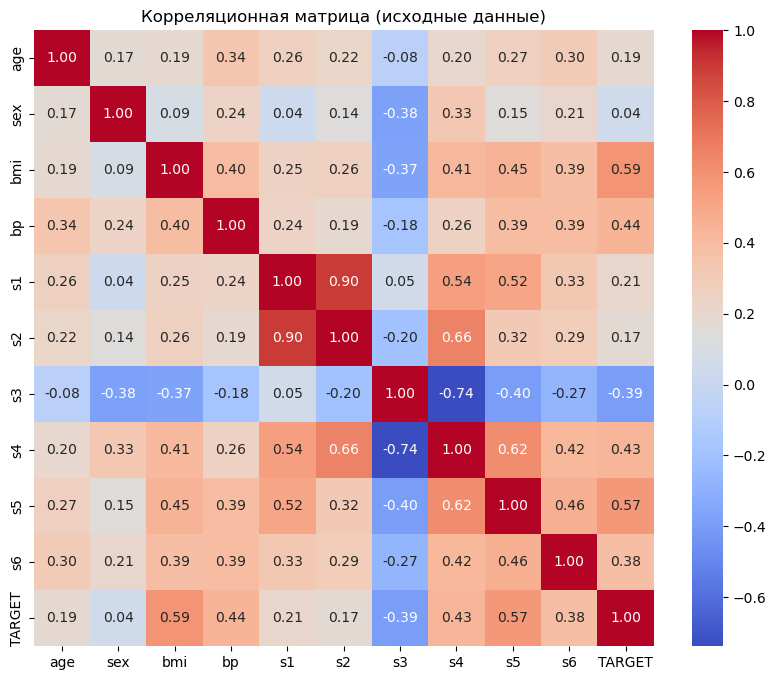

In [4]:
corr_original = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_original, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Корреляционная матрица (исходные данные)')
plt.show()

Стандартизация (чтоб было нулевое среднее и единичная дисперсия)

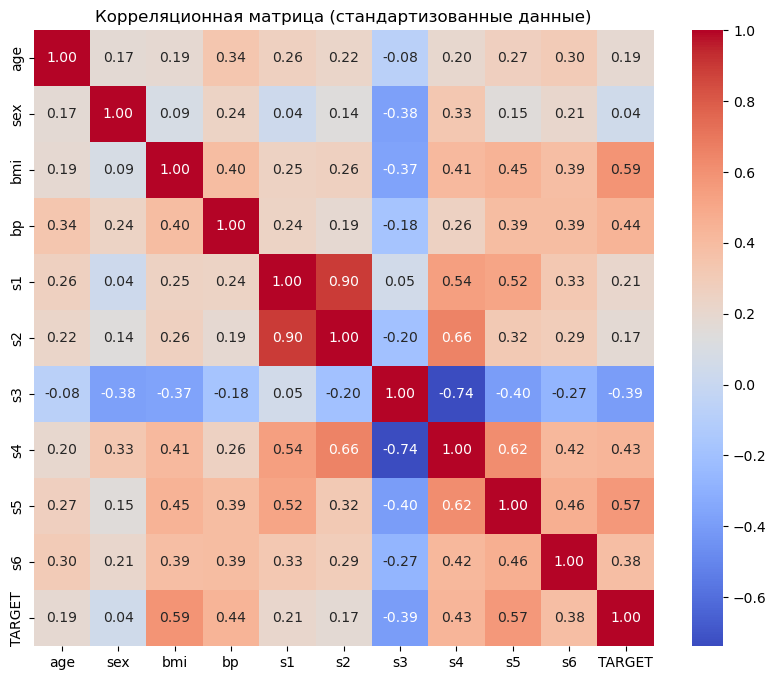

In [6]:
from sklearn.preprocessing import StandardScaler

# Cтандартизация
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.drop('TARGET', axis=1))

df_standardized = pd.DataFrame(X_scaled, columns=df.columns[:-1])
df_standardized['TARGET'] = df['TARGET']

# Вычисление новой корреляции
corr_standardized = df_standardized.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_standardized, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Корреляционная матрица (стандартизованные данные)')
plt.show()

Нормализация(приведение к диапазону от 0 до 1)

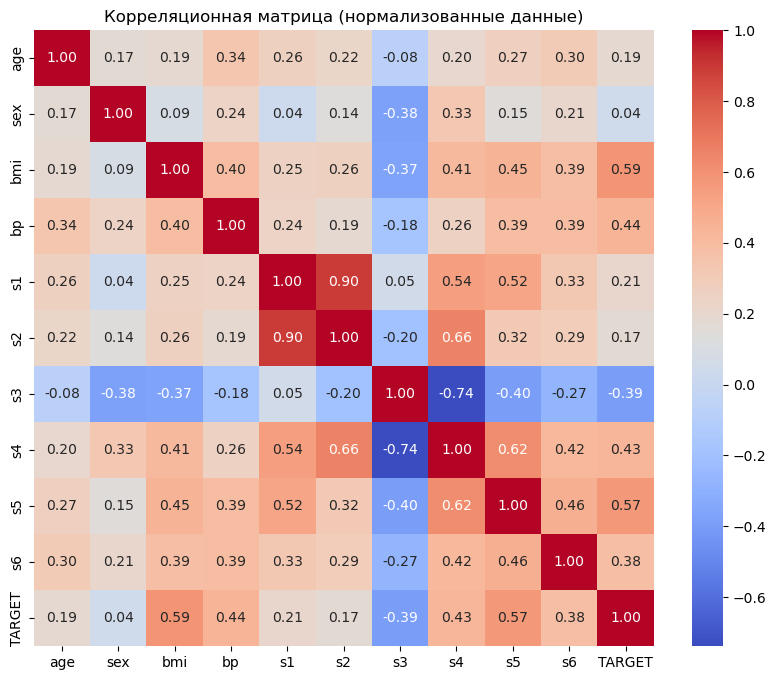

In [8]:
from sklearn.preprocessing import MinMaxScaler

# Нормализация
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(df.drop('TARGET', axis=1))

df_normalized = pd.DataFrame(X_normalized, columns=df.columns[:-1])
df_normalized['TARGET'] = df['TARGET']

# Вычисление новой корреляции
corr_normalized = df_normalized.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_normalized, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Корреляционная матрица (нормализованные данные)')
plt.show()

Логарифмирование данных (делает распределение данных более симметричным)

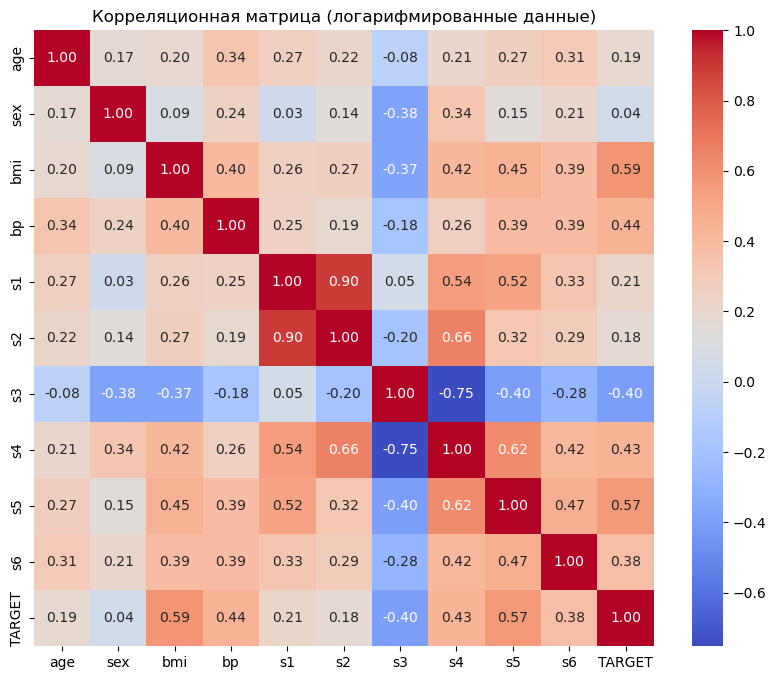

In [10]:
import numpy as np

# Логарифмирование данных (добавляем 1, чтобы избежать log(0))
X_log = np.log1p(df.drop('TARGET', axis=1))

df_log = pd.DataFrame(X_log, columns=df.columns[:-1])
df_log['TARGET'] = df['TARGET']

# Вычисление новой корреляции
corr_log = df_log.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_log, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Корреляционная матрица (логарифмированные данные)')
plt.show()